# Une introduction à la manipulation de données en Python

* l'écosystème scipy

* les bibliothèques numpy scipy et matplotlib
L'objet `ndarray`, la notion de vectorisation.

* Lecture d'un fichier excel avec pandas et xlrd
La `DataFrame` et les `Series` de pandas 


# L'écosystème scientifique Python



![the scipy ecosystem](scipy_ecosystem.png)


Toutes ces bibliothèques partagent une représentation de données communes, l'`array` numpy, mais aussi une même culture et communauté.






##  Programmation parallèle ou concurrente

- [`multprocessing`](https://docs.python.org/3/library/multiprocessing.html) & [`threading`](https://docs.python.org/3/library/threading.html)
- [Dask](https://dask.org)
- [ipyparallel](https://ipyparallel.readthedocs.io/en/latest/)


## La physique

- Algèbre linéaire, RNG, etc.: [`numpy`](https://docs.scipy.org/doc/scipy/reference/)
- ODE, fonction spéciales, interpolation, géométrie etc. [`scipy`](https://docs.scipy.org/doc/scipy/reference/)
- Éléments finis: [`SfePy`](http://sfepy.org/doc-devel/index.html)
- Mécanique des fluides: [CFD Python par Lorena Barba](https://github.com/barbagroup/CFDPython.git)


## La chimie

- [Pymol](https://pymol.org)
- [Python chemistry](https://pythoninchemistry.org/)


## Traitement d'images et vision par ordinateur

- [scikit-image](https://scikit-image.org)
- [Opencv](https://opencv.org)

## Apprentissage

- [scikit-learn](https://scikit-learn.org)

## Statistiques

- les bases: [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- [statsmodel](https://www.statsmodels.org/stable/index.html)
- [PyMCMC](https://pymcmc.readthedocs.io/en/latest/)


## Les distributions

- [Canopy](https://www.enthought.com/product/canopy/)
- [Anaconda](https://www.anaconda.com)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [8]:
ma_liste = [1, 2, 3, 4] * 100_000
mon_array = np.array(ma_liste)

In [6]:
squares = [v**2 for v in ma_liste]
mon_array**2

array([ 1,  4,  9, 16,  1,  4,  9, 16,  1,  4,  9, 16,  1,  4,  9, 16,  1,
        4,  9, 16,  1,  4,  9, 16,  1,  4,  9, 16,  1,  4,  9, 16,  1,  4,
        9, 16,  1,  4,  9, 16])

In [10]:
%timeit [v**2 for v in ma_liste]
%timeit [a**2 for a in mon_array]
%timeit mon_array**2

86.3 ms ± 688 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
83.5 ms ± 390 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
362 µs ± 6.49 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
print(mon_array.shape)
carre = np.array(
    [[0, 1, 0],
     [0, 2, 0]])
print(carre.shape)

(400000,)
(2, 3)


In [15]:
liste_c = [[0, 1, 0], [0, 2, 0]]
liste_c[1][1]

2

In [18]:
carre[1, 1]

2

In [19]:
ma_liste = [1, 2, 3, 4] * 100_000
mon_array = np.array(ma_liste)
mon_array = mon_array.reshape((400, 1000))

In [20]:
mon_array.shape

(400, 1000)

In [21]:
mon_array

array([[1, 2, 3, ..., 2, 3, 4],
       [1, 2, 3, ..., 2, 3, 4],
       [1, 2, 3, ..., 2, 3, 4],
       ...,
       [1, 2, 3, ..., 2, 3, 4],
       [1, 2, 3, ..., 2, 3, 4],
       [1, 2, 3, ..., 2, 3, 4]])

In [22]:
ma_liste

[1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,
 3,
 4,
 1,
 2,


In [25]:
mon_array[:, 1::4].shape

(400, 250)

In [26]:
mon_array == 2

array([[False,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False],
       ...,
       [False,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False]])

In [27]:
mon_array[mon_array == 2]

array([2, 2, 2, ..., 2, 2, 2])

In [28]:
np.zeros((100, 100), dtype=int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
np.ones((100, 100)) * 3.2

array([[3.2, 3.2, 3.2, ..., 3.2, 3.2, 3.2],
       [3.2, 3.2, 3.2, ..., 3.2, 3.2, 3.2],
       [3.2, 3.2, 3.2, ..., 3.2, 3.2, 3.2],
       ...,
       [3.2, 3.2, 3.2, ..., 3.2, 3.2, 3.2],
       [3.2, 3.2, 3.2, ..., 3.2, 3.2, 3.2],
       [3.2, 3.2, 3.2, ..., 3.2, 3.2, 3.2]])

In [3]:
data = np.random.random((100))

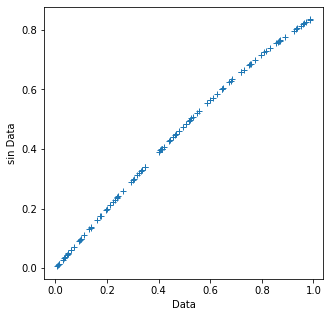

In [6]:
fig, ax = plt.subplots()

ax.plot(data, np.sin(data), '+')
ax.set_xlabel('Data')
ax.set_ylabel('sin Data')

fig.set_size_inches(5, 5)
fig.savefig('graph.png', dpi=300)

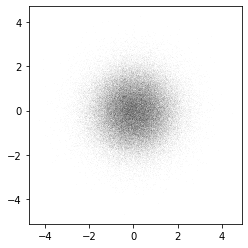

In [16]:
data2 = np.random.normal(size=(512, 512))
fig, ax = plt.subplots()
#ax.imshow(data2, origin='lower')


data = np.random.normal(size=(100000, 2))
ax.plot(data[:, 0], data[:, 1], 'k.', alpha=0.3, ms=0.05)
ax.set_aspect('equal')

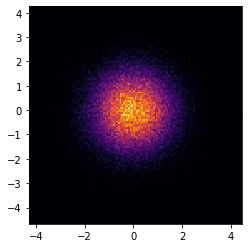

In [23]:
fig, ax = plt.subplots()
h = ax.hist2d(data[:, 0], data[:, 1], bins=128, cmap='inferno')
ax.set_aspect("equal")

In [25]:
data.shape

(100000, 2)

In [26]:
df = pd.DataFrame(data, columns=['x', 'y'])


In [28]:
df.head()

,x,y
0,0.600118,0.641785
1,-0.102566,-1.666975
2,1.596542,-0.192122
3,0.760443,-0.955803
4,0.036752,-0.797530


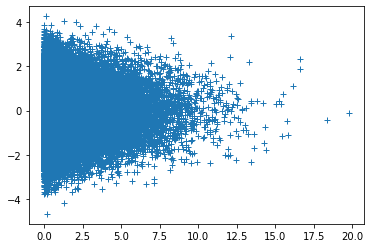

In [31]:
plt.plot(df['x']**2, df['y'], '+')

In [33]:
type(df)

pandas.core.frame.DataFrame

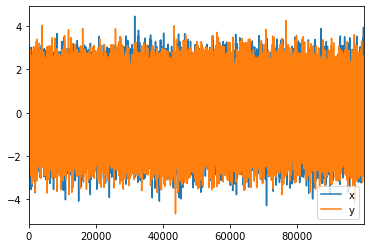

In [34]:
df.plot()

> Exercice : lire un fichier excel avec pandas et tracer un graphe

In [47]:
 pd.read_excel(
    '../reporter/data/series-1800-2015_simplified.xlsx'
).head()

,année,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Prix consommation,0.000429,0.000442,0.000474,0.000474,0.000426,0.000423,0.000416,0.000397,0.000402,...,1.118023,1.134668,1.166583,1.167584,1.185357,1.210388,1.234043,1.244806,1.251064,1.251564
3,PIB,0.009952,0.010102,0.010253,0.010407,0.010564,0.010722,0.010883,0.011046,0.011212,...,1854.384000,1946.483000,1994.516000,1939.275000,1997.265000,2058.549000,2086.815000,2115.803000,2141.368000,2181.085000
4,RDM,0.008421,0.008548,0.008676,0.008806,0.008938,0.009073,0.009209,0.009347,0.009487,...,1156.091000,1216.338000,1253.856000,1255.400000,1285.201000,1311.242000,1318.259000,1322.063000,1333.055000,1352.062000


In [50]:
time_series = pd.read_excel(
    '../reporter/data/series-1800-2015_simplified.xlsx'
)#.set_index("année").dropna(axis=0, how="all").transpose()


time_series.set_index("année", inplace=True)
time_series.dropna(axis=0, how="all", inplace=True)
time_series = time_series.transpose()
# Fix index datatype
time_series.index = time_series.index.astype(int)

time_series

année,Prix consommation,PIB,RDM,population,nb_ménages,TI_long_terme,TI_court_terme,Valeur_invest_actions,Valeur_invest_monnaie,Or,...,Prix_logement_Paris,valeur_invest_locatif,indice_loyers,ICC,conso_logements,transactions_immo,transactions_immo _ancien,dette_immo_menages,duree_prets_ancien,duree_prets_neuf
1800,0.000429,0.009952,0.008421,28601.353899,6882.055873,0.200361,0.060000,NaN,0.000153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,0.000442,0.010102,0.008548,28741.950591,6915.886240,0.102212,0.060000,NaN,0.000163,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,0.000474,0.010253,0.008676,28883.238419,6949.882908,0.095345,0.060000,3.326481e-08,0.000172,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,0.000474,0.010407,0.008806,29025.220781,6984.046694,0.097626,0.060000,3.634091e-08,0.000183,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,0.000426,0.010564,0.008938,29167.901090,7018.378421,0.091757,0.060000,3.932246e-08,0.000194,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805,0.000423,0.010722,0.009073,29311.282779,7052.878913,0.087657,0.060000,4.742729e-08,0.000205,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1806,0.000416,0.010883,0.009209,29455.369293,7087.549001,0.079427,0.065000,4.660330e-08,0.000219,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,0.000397,0.011046,0.009347,29600.164099,7122.389517,0.064767,0.054000,5.447291e-08,0.000231,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,0.000402,0.011212,0.009487,29745.670678,7157.401301,0.061470,0.040000,5.811116e-08,0.000240,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,0.000369,0.011381,0.009630,29891.892528,7192.585193,0.064604,0.040000,5.971754e-08,0.000249,0.000548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
time_series.columns

Index(['Prix consommation', 'PIB', 'RDM', 'population', 'nb_ménages',
       'TI_long_terme', 'TI_court_terme', 'Valeur_invest_actions',
       'Valeur_invest_monnaie', 'Or', 'prix_logement_Fr',
       'Prix_logement_Paris', 'valeur_invest_locatif', 'indice_loyers', 'ICC',
       'conso_logements', 'transactions_immo', 'transactions_immo _ancien',
       'dette_immo_menages', 'duree_prets_ancien', 'duree_prets_neuf'],
      dtype='object', name='année')

In [56]:
time_series.loc[2000:2005, ["RDM", 'duree_prets_ancien']]

année,RDM,duree_prets_ancien
2000,917.147,16.049216
2001,964.559,15.493666
2002,1003.415,16.857758
2003,1029.120,17.619048
2004,1074.673,18.184433
2005,1105.461,18.575578


In [57]:
time_series.iloc[10:15, :3]

année,Prix consommation,PIB,RDM
1810,0.000464,0.011551,0.009774
1811,0.000512,0.011624,0.009836
1812,0.000574,0.011698,0.009898
1813,0.000471,0.011771,0.009960
1814,0.000390,0.011846,0.010023


In [48]:
time_series.index = time_series.index.astype(int)

## Récupérer des données sur le web avec requests

> Exercice : Lire, mettre en forme, sauver et représenter des données web

In [58]:
link = "http://samples.openweathermap.org/data/2.5/forecast/hourly?id=524901&appid=b6907d289e10d714a6e88b30761fae22"

In [118]:
import requests
import json

with requests.get(link) as response:
    content = json.loads(response.content)
    
weather = pd.DataFrame(content['list'])
weather_main = pd.DataFrame.from_records(weather['main'])


In [120]:
def take_first(l):
    return l[0]
weather['weather_'] = weather['weather'].apply(take_first)

weather['weather_'] = weather['weather'].apply(lambda l: l[0])


In [124]:
# Don't do that
take_first2 = lambda l: l[0]
take_first2([100, 1, 2])

100

In [119]:
weather.loc[0, "weather"]

[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]

In [100]:
weather2 = pd.DataFrame.from_records(
    pd.DataFrame.from_records(weather['weather'])[0])

In [105]:
weather['weather'].loc[0][0]

{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}

In [106]:
weather['main'].loc[0]

{'temp': 272.09,
 'temp_min': 271.358,
 'temp_max': 272.09,
 'pressure': 1018.01,
 'sea_level': 1018.01,
 'grnd_level': 997.153,
 'humidity': 100,
 'temp_kf': 0.73}

In [102]:
pd.__version__

'0.25.0rc0+55.g07d048828'

In [111]:
take_first(weather['weather'].loc[0])

{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}

In [115]:
pd.DataFrame.from_records(weather['weather'])

,description,icon,id,main
0,broken clouds,04n,803,Clouds
1,clear sky,02n,800,Clear
2,clear sky,01n,800,Clear
3,clear sky,01n,800,Clear
4,clear sky,01n,800,Clear
5,clear sky,01n,800,Clear
6,clear sky,02n,800,Clear
7,broken clouds,04n,803,Clouds
8,broken clouds,04n,803,Clouds
9,broken clouds,04n,803,Clouds


In [112]:
type(take_first)

function

In [125]:
weather_main = pd.concat([weather_main, weather2], axis=1)

In [127]:
weather_main.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,description,icon,id,main
0,997.153,100,1018.010,1018.010,272.090,0.73,272.090,271.358,broken clouds,04n,803,Clouds
1,997.403,100,1018.335,1018.335,271.590,0.49,271.590,271.100,clear sky,02n,800,Clear
2,997.864,100,1018.794,1018.794,271.150,0.24,271.150,270.907,clear sky,01n,800,Clear
3,998.290,100,1019.211,1019.211,270.722,0.00,270.722,270.722,clear sky,01n,800,Clear
4,998.674,100,1019.580,1019.580,270.630,0.00,270.630,270.630,clear sky,01n,800,Clear


In [134]:
weather_main.index = pd.DatetimeIndex(weather['dt_txt'])

weather_main.index[0]

Timestamp('2019-03-27 18:00:00')

In [133]:
weather_main.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,description,icon,id,main
dt_txt,,,,,,,,,,,,
2019-03-27 18:00:00,997.153,100,1018.010,1018.010,272.090,0.73,272.090,271.358,broken clouds,04n,803,Clouds
2019-03-27 19:00:00,997.403,100,1018.335,1018.335,271.590,0.49,271.590,271.100,clear sky,02n,800,Clear
2019-03-27 20:00:00,997.864,100,1018.794,1018.794,271.150,0.24,271.150,270.907,clear sky,01n,800,Clear
2019-03-27 21:00:00,998.290,100,1019.211,1019.211,270.722,0.00,270.722,270.722,clear sky,01n,800,Clear
2019-03-27 22:00:00,998.674,100,1019.580,1019.580,270.630,0.00,270.630,270.630,clear sky,01n,800,Clear


In [136]:
categories = weather_main['main'].unique()

In [137]:
categories

array(['Clouds', 'Clear', 'Snow', 'Rain'], dtype=object)

In [138]:
weather_main['main'] == "Clouds"

dt_txt
2019-03-27 18:00:00     True
2019-03-27 19:00:00    False
2019-03-27 20:00:00    False
2019-03-27 21:00:00    False
2019-03-27 22:00:00    False
                       ...  
2019-03-31 13:00:00     True
2019-03-31 14:00:00     True
2019-03-31 15:00:00     True
2019-03-31 16:00:00    False
2019-03-31 17:00:00     True
Name: main, Length: 96, dtype: bool

In [143]:
categories

array(['Clouds', 'Clear', 'Snow', 'Rain'], dtype=object)

In [148]:
mean_temps = {}
for cat in categories:
    temp = weather_main[weather_main['main'] == cat]['temp'].mean()
    temp = weather_main.query(f'main == "{cat}"')['temp'].mean()
    
    mean_temps[cat] = temp

In [151]:
weather_main.groupby('main')['temp'].mean()

main
Clear     272.111364
Clouds    275.005385
Rain      278.080750
Snow      273.600000
Name: temp, dtype: float64

In [152]:
weather_main.groupby('main').mean()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,id
main,,,,,,,,,
Clear,996.330727,100.0,1017.023545,1017.023545,272.111364,0.066364,272.111364,272.044727,800.000000
Clouds,997.361667,100.0,1017.752423,1017.752423,275.005385,0.009359,275.005385,274.996000,803.538462
Rain,992.520500,100.0,1012.638250,1012.638250,278.080750,0.000000,278.080750,278.080750,500.000000
Snow,1001.435667,100.0,1021.913333,1021.913333,273.600000,0.000000,273.600000,273.600000,600.000000


In [154]:
PT_ratio = weather_main['temp'] / weather_main['pressure']

weather_main.groupby('main').apply(lambda df: (df['pressure'] / df['temp']).mean() )

main
Clear     3.737698
Clouds    3.701556
Rain      3.641830
Snow      3.735122
dtype: float64

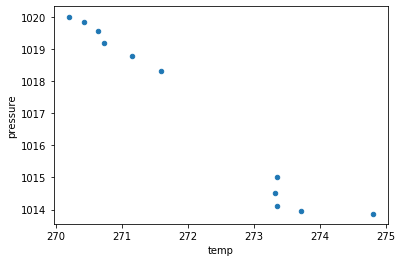

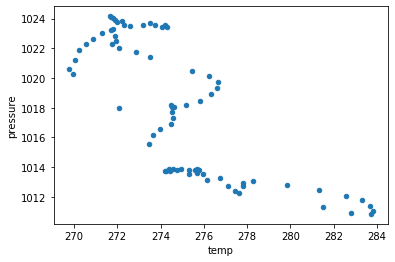

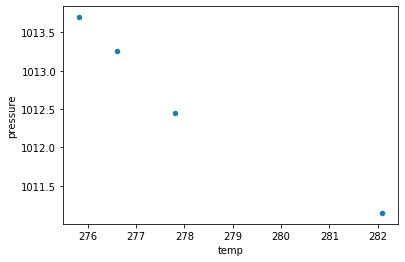

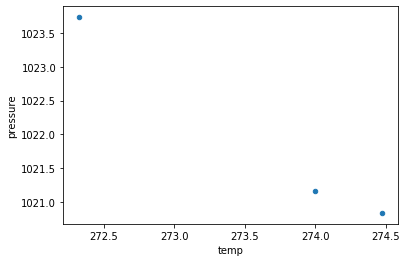

In [158]:
axes = weather_main.groupby('main').plot("temp", "pressure", kind="scatter")

In [149]:
mean_temps

{'Clouds': 275.00538461538457,
 'Clear': 272.11136363636365,
 'Snow': 273.59999999999997,
 'Rain': 278.08075}

In [96]:
weather.head()

,clouds,dt,dt_txt,main,rain,snow,sys,weather,wind
0,{'all': 60},1553709600,2019-03-27 18:00:00,"{'temp': 272.09, 'temp_min': 271.358, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 3.25, 'deg': 287.822}"
1,{'all': 2},1553713200,2019-03-27 19:00:00,"{'temp': 271.59, 'temp_min': 271.1, 'temp_max'...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.4, 'deg': 294.075}"
2,{'all': 1},1553716800,2019-03-27 20:00:00,"{'temp': 271.15, 'temp_min': 270.907, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.47, 'deg': 300.189}"
3,{'all': 1},1553720400,2019-03-27 21:00:00,"{'temp': 270.722, 'temp_min': 270.722, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.55, 'deg': 305.558}"
4,{'all': 1},1553724000,2019-03-27 22:00:00,"{'temp': 270.63, 'temp_min': 270.63, 'temp_max...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.59, 'deg': 309.126}"


In [81]:
weather_main.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min
0,997.153,100,1018.010,1018.010,272.090,0.73,272.090,271.358
1,997.403,100,1018.335,1018.335,271.590,0.49,271.590,271.100
2,997.864,100,1018.794,1018.794,271.150,0.24,271.150,270.907
3,998.290,100,1019.211,1019.211,270.722,0.00,270.722,270.722
4,998.674,100,1019.580,1019.580,270.630,0.00,270.630,270.630


In [ ]:
pd.concat()

In [82]:
weather

,clouds,dt,dt_txt,main,rain,snow,sys,weather,wind
0,{'all': 60},1553709600,2019-03-27 18:00:00,"{'temp': 272.09, 'temp_min': 271.358, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 3.25, 'deg': 287.822}"
1,{'all': 2},1553713200,2019-03-27 19:00:00,"{'temp': 271.59, 'temp_min': 271.1, 'temp_max'...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.4, 'deg': 294.075}"
2,{'all': 1},1553716800,2019-03-27 20:00:00,"{'temp': 271.15, 'temp_min': 270.907, 'temp_ma...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.47, 'deg': 300.189}"
3,{'all': 1},1553720400,2019-03-27 21:00:00,"{'temp': 270.722, 'temp_min': 270.722, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.55, 'deg': 305.558}"
4,{'all': 1},1553724000,2019-03-27 22:00:00,"{'temp': 270.63, 'temp_min': 270.63, 'temp_max...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.59, 'deg': 309.126}"
5,{'all': 0},1553727600,2019-03-27 23:00:00,"{'temp': 270.421, 'temp_min': 270.421, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.67, 'deg': 307.204}"
6,{'all': 7},1553731200,2019-03-28 00:00:00,"{'temp': 270.201, 'temp_min': 270.201, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3.94, 'deg': 304.735}"
7,{'all': 66},1553734800,2019-03-28 01:00:00,"{'temp': 269.942, 'temp_min': 269.942, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 4.24, 'deg': 306.38}"
8,{'all': 67},1553738400,2019-03-28 02:00:00,"{'temp': 269.768, 'temp_min': 269.768, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 4.63, 'deg': 313.941}"
9,{'all': 78},1553742000,2019-03-28 03:00:00,"{'temp': 270.054, 'temp_min': 270.054, 'temp_m...",NaN,NaN,{'pod': 'n'},"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 5.05, 'deg': 323.001}"


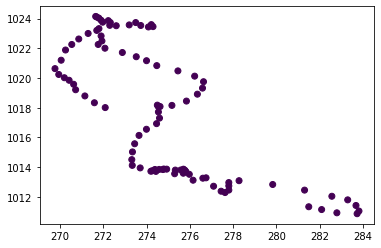

In [176]:
fig, ax = plt.subplots()
ax.scatter(
    weather_main['temp'],
    weather_main['pressure'],
    c=weather_main["humidity"])
fig.savefig('graph.png')

In [74]:
weather['main'].loc[0]

{'temp': 272.09,
 'temp_min': 271.358,
 'temp_max': 272.09,
 'pressure': 1018.01,
 'sea_level': 1018.01,
 'grnd_level': 997.153,
 'humidity': 100,
 'temp_kf': 0.73}

In [87]:
weather.shape[0] == weather_main.shape[0]

True

In [86]:
weather.shape

(96, 9)

In [163]:
weather_main.resample('D').mean()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,id
dt_txt,,,,,,,,,
2019-03-27,998.045000,100.0,1018.963167,1018.963167,271.100500,0.243333,271.100500,270.856333,800.500000
2019-03-28,1002.171208,100.0,1022.965167,1022.965167,271.927000,0.000000,271.927000,271.927000,794.958333
2019-03-29,999.287417,100.0,1019.671750,1019.671750,274.227667,0.000000,274.227667,274.227667,786.958333
2019-03-30,993.445375,100.0,1013.605583,1013.605583,275.650375,0.000000,275.650375,275.650375,764.750000
2019-03-31,992.348389,100.0,1012.480111,1012.480111,279.269111,0.000000,279.269111,279.269111,786.277778


In [165]:
weather_main.resample("min").max()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,description,icon,id,main
dt_txt,,,,,,,,,,,,
2019-03-27 18:00:00,997.153,100.0,1018.010,1018.010,272.09,0.73,272.09,271.358,broken clouds,04n,803.0,Clouds
2019-03-27 18:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27 18:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27 18:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27 18:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27 18:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27 18:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27 18:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27 18:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
import sqlite3

In [171]:
# https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
with sqlite3.connect("../chinook.db") as conn:
    data_b = pd.read_sql_query("SELECT * FROM TRACKS", conn)


In [173]:
data_b.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [174]:
type(data_b)

pandas.core.frame.DataFrame

In [175]:
weather_main.describe()

,grnd_level,humidity,pressure,sea_level,temp,temp_kf,temp_max,temp_min,id
count,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000
mean,997.169135,100.0,1017.585844,1017.585844,274.758000,0.015208,274.758000,274.742740,784.12500
std,4.150612,0.0,4.402044,4.402044,3.370998,0.092247,3.370998,3.385917,69.34388
min,990.638000,100.0,1010.863000,1010.863000,269.768000,0.000000,269.768000,269.768000,500.00000
25%,993.446000,100.0,1013.709000,1013.709000,272.087000,0.000000,272.087000,272.052000,803.00000
50%,997.403000,100.0,1018.043500,1018.043500,274.411000,0.000000,274.411000,274.411000,803.00000
75%,1001.249500,100.0,1021.917250,1021.917250,276.020750,0.000000,276.020750,276.020750,804.00000
max,1003.522000,100.0,1024.147000,1024.147000,283.821000,0.730000,283.821000,283.821000,804.00000
